<img src="https://www.history.com/.image/t_share/MTU3ODc3NjU4OTAyNDA2ODc5/titanic.jpg">


<h1><center> ML Webinar - 2 - Titanic: Machine Learning from Disaster </center></h1>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The dataset is taken from most famous [Kaggle](https://www.kaggle.com/c/titanic/overview) competition. The data dictionary looks like:

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning and preparation
- Model building
- Model evaluation


# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

**Use pandas to read titanic_data.csv as a dataframe.**

In [150]:
df = pd.read_csv("titanic_data.csv")

**Check out the info(), head(), and describe() methods on dataset.**

In [151]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a heatmap on dataset to visualize null values**


In [154]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

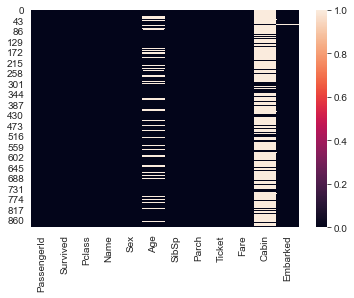

In [155]:
sns.heatmap(df.isnull())

**Check Survival Rate**

In [156]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

c:\users\murtuza\anaconda3\envs\dxbanking\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

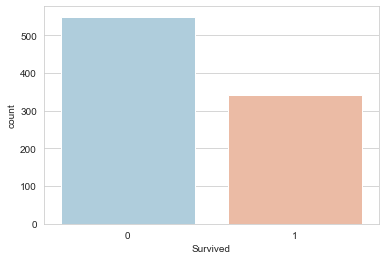

In [157]:
sns.set_style("whitegrid")
sns.countplot(df.Survived, palette="RdBu_r")

**Check survival rate for Male & Female individually.**

c:\users\murtuza\anaconda3\envs\dxbanking\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

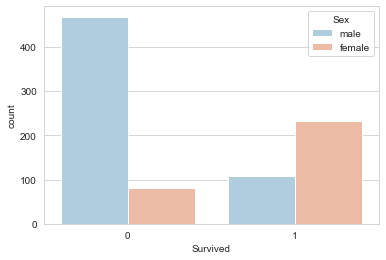

In [158]:
sns.set_style("whitegrid")
sns.countplot(df.Survived, hue=df.Sex, palette="RdBu_r")

**Check survival rate for each passenger class.**

c:\users\murtuza\anaconda3\envs\dxbanking\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

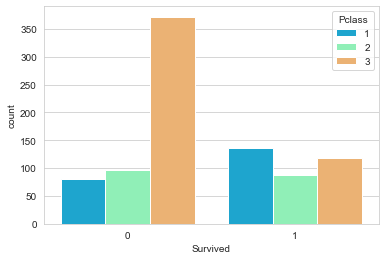

In [159]:
sns.set_style("whitegrid")
sns.countplot(df.Survived, hue=df.Pclass, palette="rainbow")

**Check age distribution for all the passengers on titanic**

c:\users\murtuza\anaconda3\envs\dxbanking\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

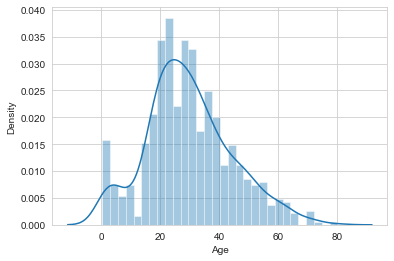

In [160]:
sns.distplot(df.Age.dropna(),bins=30)

**Check Fare distribution for all the passengers on titanic**

c:\users\murtuza\anaconda3\envs\dxbanking\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

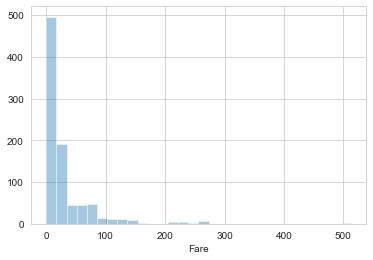

In [161]:
sns.distplot(df.Fare,kde=False,bins=30)

**Check for ourliers in age**

c:\users\murtuza\anaconda3\envs\dxbanking\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

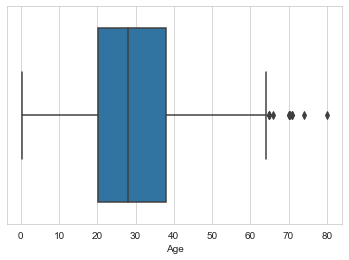

In [162]:
sns.boxplot(df.Age)

**Check for ourliers in fare**

c:\users\murtuza\anaconda3\envs\dxbanking\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


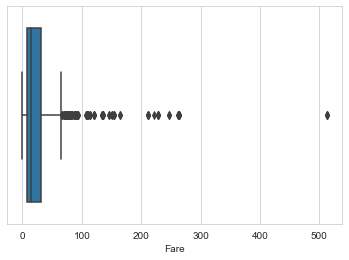

In [163]:
sns.boxplot(df.Fare)
plt.show()

# Data Cleaning

Missing Value Treatment
- Remove them (Data Loss)
- Impute them (Data Biasness)

In [164]:
df.groupby("Pclass")["Age"].mean().round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [165]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        
        else:
            return 25
        
    else:
        return Age

In [166]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

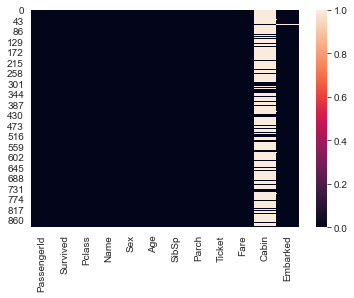

In [167]:
sns.heatmap(df.isnull())

In [168]:
df.drop("Cabin",1,inplace=True)

<AxesSubplot:>

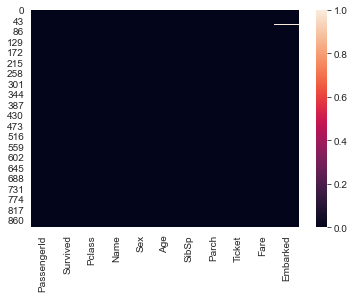

In [169]:
sns.heatmap(df.isnull())

In [170]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [171]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [172]:
df.Embarked = df.Embarked.fillna("S")

In [173]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Outlier Treatment

### Inter Quantile Range

- IQR = Q3-Q1
- lower = Q1 - 1.5 IQR
- upper = Q3 + 1.5*IQR

In [174]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Categorical Features

Notice that the **Sex** & **Embarked** columns are categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 2 element containing these column names.**

In [175]:
cat_feats = ['Sex','Embarked']

**Now use pd.get_dummies() to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [176]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [177]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


In [178]:
final_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


**Drop unneccesary columns**

In [179]:
final_data.drop(["PassengerId","Name","Ticket"],1,inplace=True)

In [180]:
final_data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

**Check for multi-collinearity**

<AxesSubplot:>

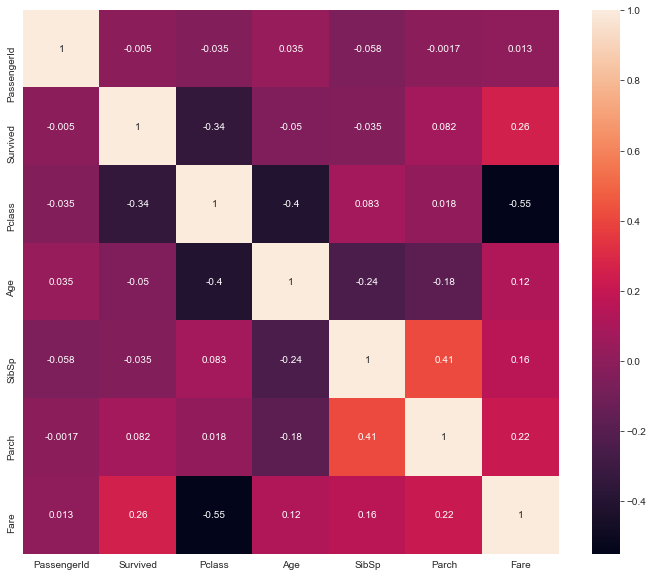

In [181]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [182]:
from sklearn.model_selection import train_test_split

X = final_data.drop('Survived',axis=1)
y = final_data['Survived']


# stratify=y suggests a stratified split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.30, random_state=1)

In [183]:
y_train.value_counts(normalize=True)

0    0.635634
1    0.364366
Name: Survived, dtype: float64

In [184]:
y_test.value_counts(normalize=True)

0    0.570896
1    0.429104
Name: Survived, dtype: float64

# Model Building

- Using Logistics Regression as our base model

In [185]:
results = pd.DataFrame(columns=['Logistic Regression', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes'], 
                      index=['W/O Feature Scaling','With Feature Scaling'])

In [186]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') # class_weight='balanced'

model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Predictions and Evaluation of Logistic Regression
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [187]:
y_pred = model.predict(X_test)

In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['W/O Feature Scaling', 'Logistic Regression'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7686567164179104

[[132  21]
 [ 41  74]]

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.78      0.64      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



In [189]:
# Training Accuracy
model.score(X_train,y_train)

0.812199036918138

## Training a Gaussian Naive Bayes Model


In [190]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [191]:
# Training Accuracy
gnb.score(X_train,y_train)

0.8009630818619583

## Predictions and Evaluation of Gaussian Naive Bayes
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [192]:
y_pred = gnb.predict(X_test)

In [193]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['W/O Feature Scaling', 'Gaussian Naive Bayes'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7649253731343284

[[125  28]
 [ 35  80]]

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       153
           1       0.74      0.70      0.72       115

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.76      0.76      0.76       268



## Training a Multinomial Naive Bayes Model


In [194]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

In [195]:
# Training Accuracy
mnb.score(X_train,y_train)

0.709470304975923

## Predictions and Evaluation of Multinomial Naive Bayes
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [196]:
y_pred = mnb.predict(X_test)

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['W/O Feature Scaling', 'Multinomial Naive Bayes'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.6380597014925373

[[121  32]
 [ 65  50]]

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       153
           1       0.61      0.43      0.51       115

    accuracy                           0.64       268
   macro avg       0.63      0.61      0.61       268
weighted avg       0.63      0.64      0.63       268



## Training a Bernoulli Naive Bayes Model


In [198]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

BernoulliNB()

In [199]:
# Training Accuracy
bnb.score(X_train,y_train)

0.7913322632423756

## Predictions and Evaluation of Bernoulli Naive Bayes
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [200]:
y_pred = bnb.predict(X_test)

In [201]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['W/O Feature Scaling', 'Bernoulli Naive Bayes'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.753731343283582

[[127  26]
 [ 40  75]]

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       153
           1       0.74      0.65      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



## Feature Scaling

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') # class_weight='balanced'

model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Predictions and Evaluation of Logistic Regression
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [204]:
y_pred = model.predict(X_test)

In [205]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['With Feature Scaling', 'Logistic Regression'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7649253731343284

[[131  22]
 [ 41  74]]

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.77      0.64      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [206]:
# Training Accuracy
model.score(X_train,y_train)

0.8105939004815409

## Training a Gaussian Naive Bayes Model


In [207]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [208]:
# Training Accuracy
gnb.score(X_train,y_train)

0.8009630818619583

## Predictions and Evaluation of Gaussian Naive Bayes
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [209]:
y_pred = gnb.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['With Feature Scaling', 'Gaussian Naive Bayes'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7649253731343284

[[125  28]
 [ 35  80]]

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       153
           1       0.74      0.70      0.72       115

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.76      0.76      0.76       268



## Training a Multinomial Naive Bayes Model


In [211]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

In [212]:
# Training Accuracy
mnb.score(X_train,y_train)

0.6629213483146067

## Predictions and Evaluation of Multinomial Naive Bayes
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [213]:
y_pred = mnb.predict(X_test)

In [214]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['With Feature Scaling', 'Multinomial Naive Bayes'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.5970149253731343

[[144   9]
 [ 99  16]]

              precision    recall  f1-score   support

           0       0.59      0.94      0.73       153
           1       0.64      0.14      0.23       115

    accuracy                           0.60       268
   macro avg       0.62      0.54      0.48       268
weighted avg       0.61      0.60      0.51       268



## Training a Bernoulli Naive Bayes Model


In [215]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

BernoulliNB()

In [216]:
# Training Accuracy
bnb.score(X_train,y_train)

0.7817014446227929

## Predictions and Evaluation of Bernoulli Naive Bayes
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [217]:
y_pred = bnb.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

results.loc['With Feature Scaling', 'Bernoulli Naive Bayes'] = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7238805970149254

[[129  24]
 [ 50  65]]

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       153
           1       0.73      0.57      0.64       115

    accuracy                           0.72       268
   macro avg       0.73      0.70      0.71       268
weighted avg       0.72      0.72      0.72       268



In [219]:
results

,Logistic Regression,Gaussian Naive Bayes,Multinomial Naive Bayes,Bernoulli Naive Bayes
W/O Feature Scaling,0.768657,0.764925,0.63806,0.753731
With Feature Scaling,0.764925,0.764925,0.597015,0.723881
